In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from features import calculateIC, frequency_index

In [3]:
TRAIN_DIR = "./data_gen/data/train/"
TEST_DIR = "./data_gen/data/test/"

In [4]:
plain = open(TRAIN_DIR+ "plain_text_long.txt").read().splitlines()
ss = open(TRAIN_DIR + "simple_sub_long.txt").read().splitlines()
vig = open(TRAIN_DIR + "vig_long.txt").read().splitlines()

In [5]:
test_plain = open(TEST_DIR+ "plain.txt").read().splitlines()
test_ss = open(TEST_DIR + "simple_sub.txt").read().splitlines()
test_vig = open(TEST_DIR + "vig.txt").read().splitlines()

In [6]:
def get_ic_list(l):
    ic = []
    for i in l:
        ic_i = calculateIC(i)
        ic += [ic_i]
    return ic

def get_freq_list(l):
    freq = []
    for i in l:
        freq_i = frequency_index(i)
        freq += [freq_i]
    return freq


## Training data

In [7]:
freq_ss = get_freq_list(ss)
ic_ss = get_ic_list(ss)
freq_vig = get_freq_list(vig)
ic_vig = get_ic_list(vig)

## Test Data

In [8]:
test_freq_ss = get_freq_list(test_ss)
test_ic_ss = get_ic_list(test_ss)
test_freq_vig = get_freq_list(test_vig)
test_ic_vig = get_ic_list(test_vig)

In [9]:
freq_ss[:5], freq_vig[:5], ic_ss[:5], ic_vig[:5]

([1.1102230246251565e-16,
  0.0,
  1.1102230246251565e-16,
  2.2204460492503131e-16,
  1.1102230246251565e-16],
 [8.3266726846886741e-17,
  1.6653345369377348e-16,
  8.3266726846886741e-17,
  2.2204460492503131e-16,
  -5.5511151231257827e-17],
 [0.06247194373784229,
  0.06875654646117013,
  0.07290372670807453,
  0.07553101756000306,
  0.0714622641509434],
 [0.04361813556785875,
  0.04309441867424809,
  0.04759316770186335,
  0.044245073230580474,
  0.044182389937106915])

plt.figure(figsize=(8,8))
plt.plot(ic_ss, freq_ss, 'bo', alpha=0.8)
plt.plot(ic_vig, freq_vig, 'r^', alpha=0.8)
plt.xlabel("IC")
plt.ylabel("FREQUENCY")
plt.show()

In [10]:
train_vig = np.array([ic_vig, freq_vig], dtype=np.float64).T
train_ss = np.array([ic_ss, freq_ss], dtype=np.float64).T

In [11]:
test_vig = np.array([test_ic_vig, test_freq_vig]).T
test_ss = np.array([test_ic_ss, test_freq_ss]).T

In [12]:
ic_vig[:5], train_vig[:5,0]

([0.04361813556785875,
  0.04309441867424809,
  0.04759316770186335,
  0.044245073230580474,
  0.044182389937106915],
 array([ 0.04361814,  0.04309442,  0.04759317,  0.04424507,  0.04418239]))

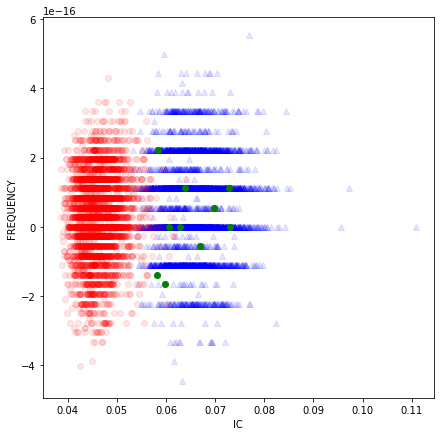

In [13]:
plt.figure(figsize=(7,7))
plt.plot(train_ss[:,0], train_ss[:,1], 'b^', alpha=0.1)
plt.plot(train_vig[:,0], train_vig[:,1], 'ro', alpha=0.1)
plt.plot(test_ss[:,0], test_ss[:,1], 'go')
plt.xlabel("IC")
plt.ylabel("FREQUENCY")
plt.show()

Zero for simple sub and one for vigenere

In [26]:
num_train = x_train.shape[0]
num_test = x_test.shape[0]
num_test, num_train

(20, 10000)

In [28]:
yv = np.ones(int(num_train/2))
ys = np.zeros(int(num_train/2))

In [29]:
x_train = np.vstack((train_ss, train_vig))
y_train = np.hstack((ys, yv)).reshape(-1, 1)

In [30]:
x_test = np.vstack((test_ss, test_vig))
y_test = np.hstack((np.zeros(50), np.ones(50)))

In [14]:
from keras.models import Sequential
from keras.layers import Dense

ImportError: No module named keras.models

In [44]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=120, batch_size=50,  verbose=2)

Epoch 1/120
0s - loss: 1.1947 - acc: 0.5000
Epoch 2/120
0s - loss: 0.9054 - acc: 0.5000
Epoch 3/120
0s - loss: 0.8066 - acc: 0.5000
Epoch 4/120
0s - loss: 0.7591 - acc: 0.5000
Epoch 5/120
0s - loss: 0.7355 - acc: 0.5000
Epoch 6/120
0s - loss: 0.7237 - acc: 0.4999
Epoch 7/120
0s - loss: 0.7181 - acc: 0.4997
Epoch 8/120
0s - loss: 0.7153 - acc: 0.4918
Epoch 9/120
0s - loss: 0.7135 - acc: 0.4423
Epoch 10/120
0s - loss: 0.7120 - acc: 0.2387
Epoch 11/120
0s - loss: 0.7105 - acc: 0.2632
Epoch 12/120
0s - loss: 0.7090 - acc: 0.1312
Epoch 13/120
0s - loss: 0.7073 - acc: 0.2437
Epoch 14/120
0s - loss: 0.7056 - acc: 0.2738
Epoch 15/120
0s - loss: 0.7037 - acc: 0.2394
Epoch 16/120
0s - loss: 0.7017 - acc: 0.2483
Epoch 17/120
0s - loss: 0.6996 - acc: 0.4499
Epoch 18/120
0s - loss: 0.6974 - acc: 0.2821
Epoch 19/120
0s - loss: 0.6952 - acc: 0.4991
Epoch 20/120
0s - loss: 0.6928 - acc: 0.4868
Epoch 21/120
0s - loss: 0.6904 - acc: 0.6398
Epoch 22/120
0s - loss: 0.6879 - acc: 0.5224
Epoch 23/120
0s - l

In [51]:
model.predict(x_test)

array([[0.45376754],
       [0.37380475],
       [0.3271978 ],
       [0.2867465 ],
       [0.41985208],
       [0.4317348 ],
       [0.23807847],
       [0.38900346],
       [0.45616335],
       [0.24141955],
       [0.65788305],
       [0.5873896 ],
       [0.639738  ],
       [0.55270964],
       [0.64832646],
       [0.66358584],
       [0.5947546 ],
       [0.63746035],
       [0.67551595],
       [0.6567801 ]], dtype=float32)